In [1]:
import pandas as pd

In [73]:
df = pd.read_csv(r"D:\ML MaM project\ola1.csv")

In [74]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [76]:
df.shape


(10886, 12)

In [77]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [79]:
parts = df["datetime"].str.split(" ", n=2, expand=True)
df["date"] = parts[0]
df["time"] = parts[1].str[:2].astype('int')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4


In [80]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4


In [81]:
#Extract Days ,Month
parts = df["date"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,2011,1,1


In [82]:
from datetime import datetime

df['datetime'] = pd.to_datetime(df['datetime'])

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

def weekend_or_weekday(year, month, day):
    try:
        d = datetime(year, month, day)
        return 0 if d.weekday() > 4 else 1
    except ValueError:
        return np.nan 

df['weekday'] = df.apply(lambda x: weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,1,1,2011,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,1,1,2011,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,1,1,2011,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,1,1,2011,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,1,1,2011,0


In [83]:
def weekend_or_weekday(year, month, day):
    try:
        d = datetime(year, month, day)
        return 0 if d.weekday() > 4 else 1
    except ValueError:
        return np.nan 

df['weekday'] = df.apply(lambda x: weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,1,1,2011,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,1,1,2011,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,1,1,2011,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,1,1,2011,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,1,1,2011,0


In [84]:
def am_or_pm(x):
    if x > 11:
        return 1
    else:
        return 0


df['am_or_pm'] = df['time'].apply(am_or_pm)
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday,am_or_pm
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,1,1,2011,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,1,1,2011,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,1,1,2011,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,1,1,2011,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,1,1,2011,0,0


In [85]:
from datetime import date
import holidays


def is_holiday(x):

    india_holidays = holidays.country_holidays('IN')

    if india_holidays.get(x):
        return 1
    else:
        return 0


df['holidays'] = df['date'].apply(is_holiday)
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday,am_or_pm,holidays
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,1,1,2011,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,1,1,2011,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,1,1,2011,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,1,1,2011,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,1,1,2011,0,0,0


In [58]:
!pip install holidays

In [86]:
#Remove unnecessary columns 
df.drop(['datetime', 'date'],
        axis=1,
        inplace=True)

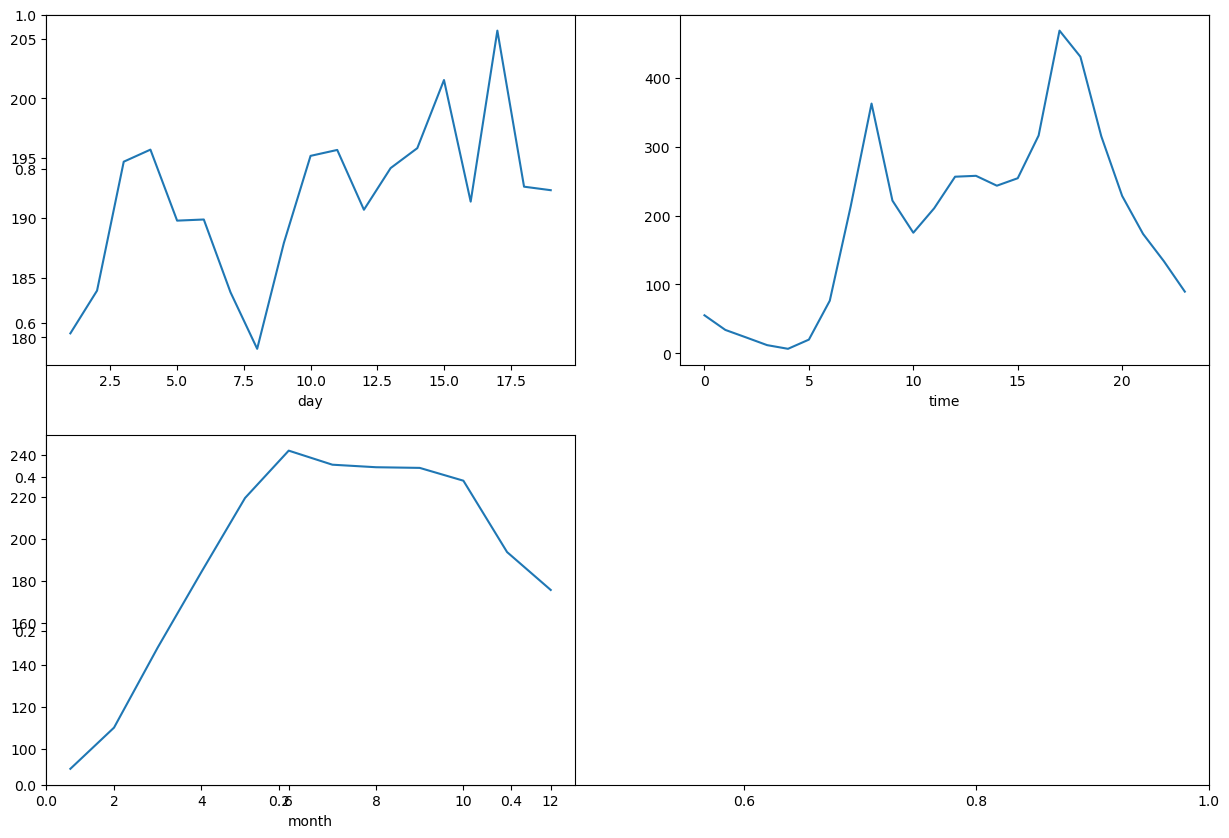

In [87]:
#EDA Process (check for any relation between the ride request count with respect to the day, time, or month.)
features = ['day', 'time', 'month']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['count'].plot()
plt.show()


In [61]:
'''
    The Above lines represents 
        There is no such pattern in the day-wise average of the ride requests.
        More ride requests in the working hours as compared to the non-working hours.
'''

'\n    The Above lines represents \n        There is no such pattern in the day-wise average of the ride requests.\n        More ride requests in the working hours as compared to the non-working hours.\n'

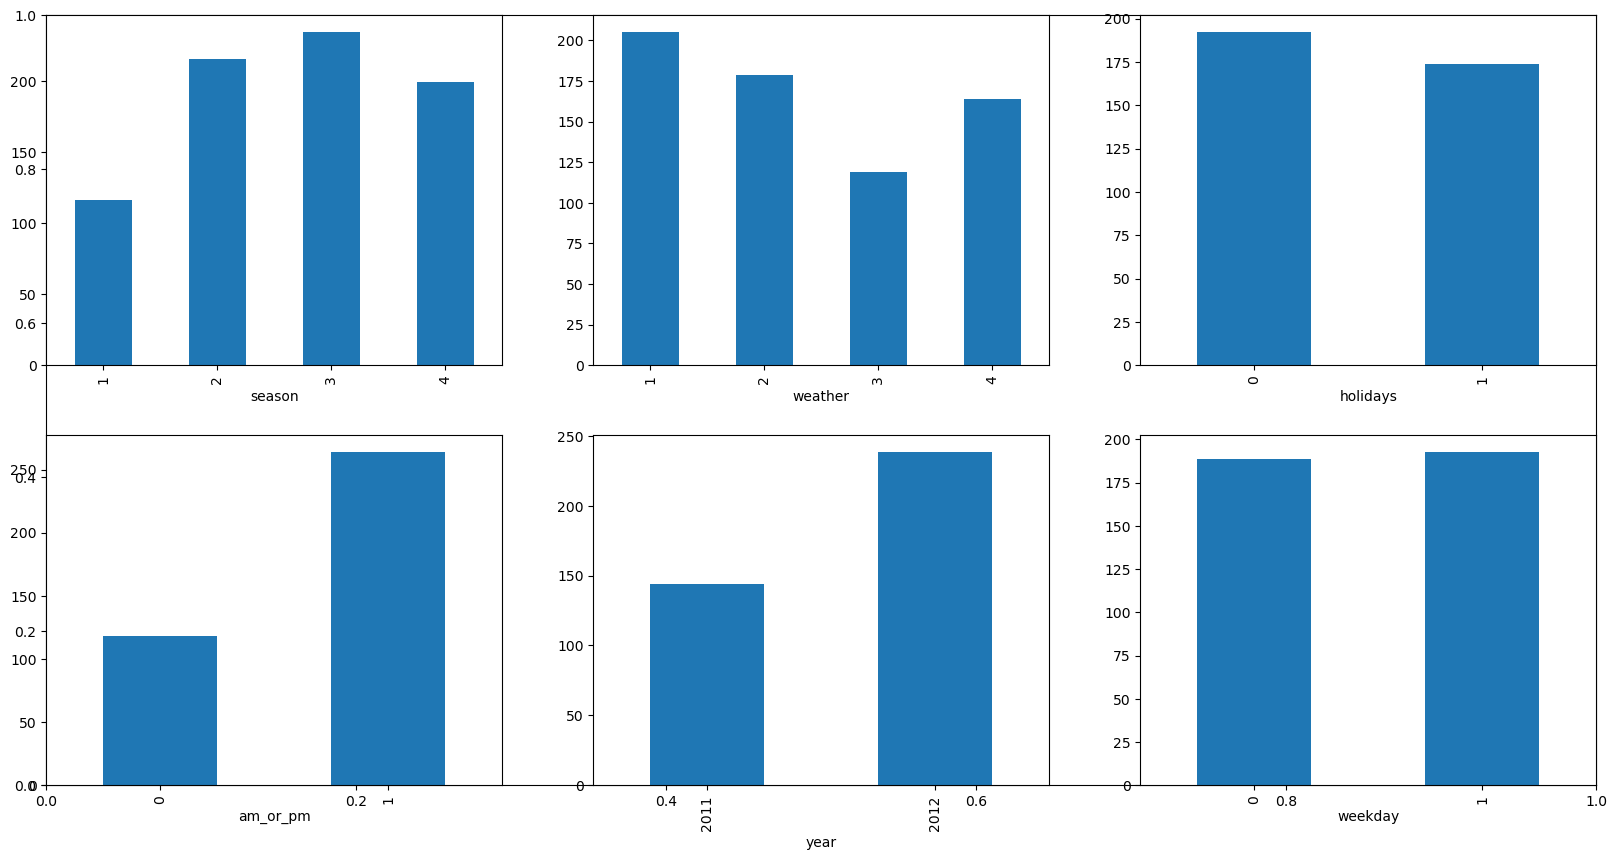

In [88]:
features = ['season', 'weather', 'holidays',\
            'am_or_pm', 'year', 'weekday']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    df.groupby(col).mean()['count'].plot.bar()
plt.show()


In [63]:
"""
    The Above Bars

    Ride request demand is high in the summer as well as season.
    The third category was extreme weather conditions due to this people avoid taking bike rides and like to stay safe at home.
    On holidays no college or offices are open due to this ride request demand is low.
"""

'\n    The Above Bars\n\n    Ride request demand is high in the summer as well as season.\n    The third category was extreme weather conditions due to this people avoid taking bike rides and like to stay safe at home.\n    On holidays no college or offices are open due to this ride request demand is low.\n'

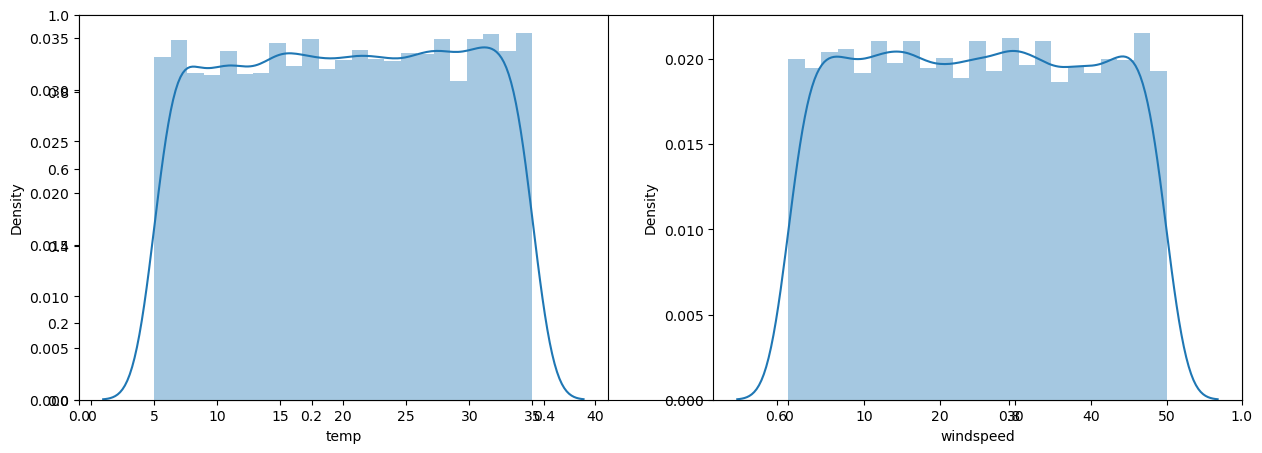

In [64]:
features = ['temp', 'windspeed']

plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
  plt.subplot(1, 2, i + 1)
  sb.distplot(df[col])
plt.show()


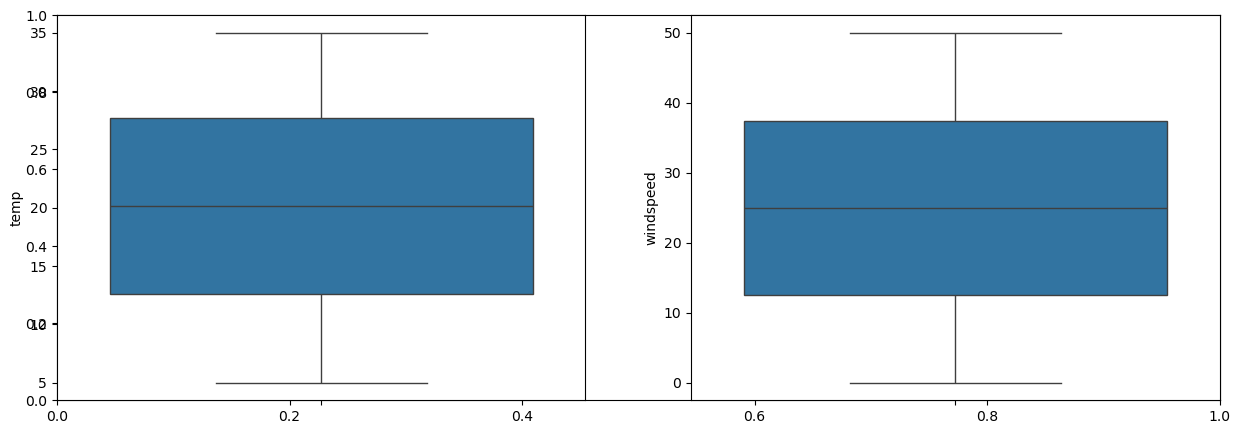

In [65]:
features = ['temp', 'windspeed']

plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
  plt.subplot(1, 2, i + 1)
  sb.boxplot(df[col])
plt.show()


In [66]:
num_rows = df.shape[0] - df[df['windspeed']<32].shape[0]
print(f'Number of rows that will be lost if we remove outliers is equal to {num_rows}.')


Number of rows that will be lost if we remove outliers is equal to 3891.


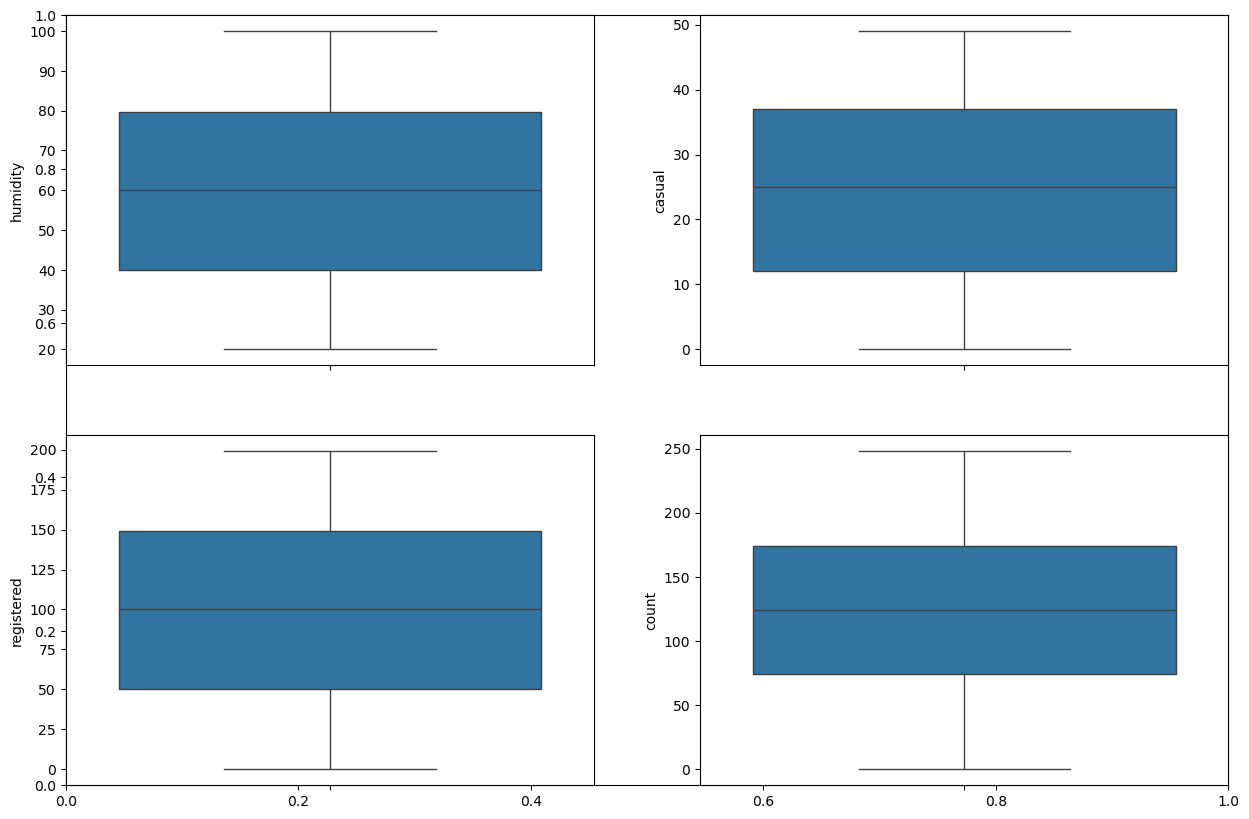

In [67]:
features = ['humidity', 'casual', 'registered', 'count']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sb.boxplot(df[col])
plt.show()


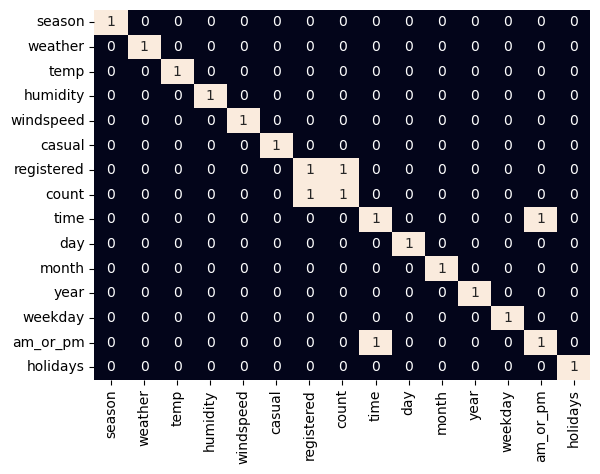

In [68]:
sb.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()


In [69]:
df.drop(['registered', 'time'], axis=1, inplace=True)
df = df[(df['windspeed'] < 32) & (df['humidity'] > 0)]


In [70]:
features = df.drop(['count'], axis=1)
target = df['count'].values

X_train, X_val, Y_train, Y_val = train_test_split(features,
                                                  target,
                                                  test_size = 0.1,
                                                  random_state=22)
X_train.shape, X_val.shape


((6295, 12), (700, 12))

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [72]:
models = [LinearRegression(), Lasso(), RandomForestRegressor(), Ridge()]

for i in range(len(models)):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} :')

    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))

    val_preds = models[i].predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    print()


LinearRegression() :
Training Error :  49.767059298718415
Validation Error :  49.4547457726743

Lasso() :
Training Error :  49.806780458411176
Validation Error :  49.372163863241035

RandomForestRegressor() :
Training Error :  18.783389992057188
Validation Error :  50.738800000000005

Ridge() :
Training Error :  49.767051662449454
Validation Error :  49.45470753637862

